In [13]:
#Import packages and test log grabbing with grok

from pygrok import Grok
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geoip2.database
import plotly.express as px
from mpl_toolkits.basemap import Basemap
import seaborn as sns




text = '108.28.249.14 - - [27/Apr/2023:18:49:00 +0000] "GET /images/executive-members/etosgpvkce2b0fc9904330b616e4.jpeg HTTP/2.0" 499 0 "https://rspnepal.org/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15"'
pattern = '\A%{IP:ip} - - \[%{HTTPDATE:timestamp}\] "%{WORD:method} %{URIPATHPARAM:path} %{URIPROTO:protocol}/%{NUMBER:version}" %{NUMBER:response_code} %{NUMBER:content_length} "%{GREEDYDATA:referrer}" "%{GREEDYDATA:user_agent}"'
grok = Grok(pattern)
print(grok.match(text))

{'ip': '108.28.249.14', 'timestamp': '27/Apr/2023:18:49:00 +0000', 'method': 'GET', 'path': '/images/executive-members/etosgpvkce2b0fc9904330b616e4.jpeg', 'protocol': 'HTTP', 'version': '2.0', 'response_code': '499', 'content_length': '0', 'referrer': 'https://rspnepal.org/', 'user_agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15'}


In [14]:
#parses and arranges the logs into a dictionary of lists

data = {'ip':[],
        'timestamp':[],
        'method':[],
        'path':[],
        'protocol':[],
        'version':[],
        'response_code':[],
        'content_length':[],
        'referrer':[],
        'user_agent':[]
       }



f = open("logs/test.log", "r")

c=0
for x in f:
    a = grok.match(x)
    try:
        for i in a:
            data[i].append(a[i])
    except TypeError:  #incase of failure to parse some logs continue
        c = c+ 1
        continue
print("total none value detected is " + str(c))
 
# generates a dataframe
df = pd.DataFrame(data)
df




total none value detected is 0


,ip,timestamp,method,path,protocol,version,response_code,content_length,referrer,user_agent
0,120.89.104.130,27/Apr/2023:00:00:34 +0000,GET,/downloads/?limit=20&page=1,HTTP,1.1,200,2704,-,Dart/2.18 (dart:io)
1,5.195.212.133,27/Apr/2023:00:00:34 +0000,GET,/district/4,HTTP,1.1,200,2852,-,Dart/2.18 (dart:io)
2,111.119.49.187,27/Apr/2023:00:00:34 +0000,GET,/app-configs,HTTP,1.1,200,90,-,Dart/2.18 (dart:io)
3,49.126.156.158,27/Apr/2023:00:00:34 +0000,OPTIONS,/district/Male,HTTP,2.0,204,0,-,Mozilla/5.0 (Linux; Android 11; SM-M022G Build...
4,111.119.49.187,27/Apr/2023:00:00:34 +0000,GET,/downloads/?limit=20&page=1,HTTP,1.1,200,2704,-,Dart/2.18 (dart:io)
...,...,...,...,...,...,...,...,...,...,...
715462,176.202.56.115,27/Apr/2023:19:39:02 +0000,OPTIONS,/logout,HTTP,2.0,499,0,-,Mozilla/5.0 (Linux; Android 10; M2006C3MG) App...
715463,99.247.224.242,27/Apr/2023:19:18:53 +0000,OPTIONS,/logout,HTTP,2.0,499,0,-,Mozilla/5.0 (Linux; Android 10; SM-G965W) Appl...
715464,99.247.224.242,27/Apr/2023:19:18:53 +0000,OPTIONS,/executive-members?limit=50,HTTP,2.0,499,0,-,Mozilla/5.0 (Linux; Android 10; SM-G965W) Appl...
715465,99.247.224.242,27/Apr/2023:19:18:53 +0000,OPTIONS,/dashboard/v2,HTTP,2.0,499,0,-,Mozilla/5.0 (Linux; Android 10; SM-G965W) Appl...


In [15]:
df.describe()

,ip,timestamp,method,path,protocol,version,response_code,content_length,referrer,user_agent
count,715467,715467,715467,715467,715467,715467,715467,715467,715467,715467
unique,15498,55073,6,9536,1,2,18,9218,1,4083
top,43.204.239.5,27/Apr/2023:12:04:18 +0000,GET,/dashboard/v2,HTTP,1.1,200,0,-,Dart/2.18 (dart:io)
freq,35231,639,610933,31916,715467,560338,564610,103361,715467,516297


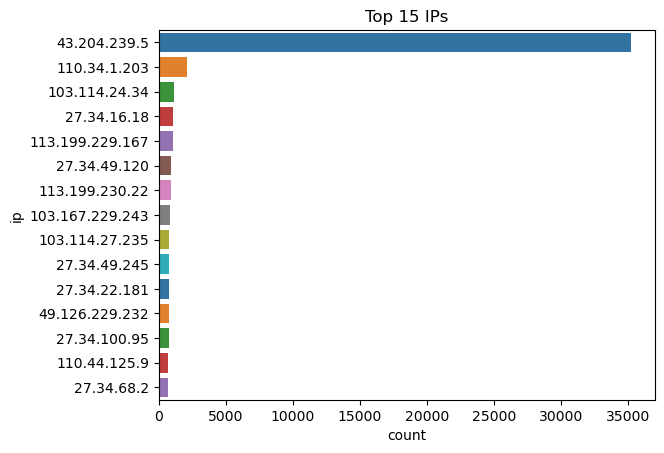

In [16]:
top_ips = df.ip.value_counts().head(15)
filtered_df = df[df['ip'].isin(top_ips.index)]
category_counts = filtered_df.ip.value_counts()
sorted_categories = category_counts.index
sorted_categories


sns.countplot(y="ip",palette="tab10",order=sorted_categories, data=df[df.ip.isin(top_ips.index)]).set_title('Top 15 IPs');

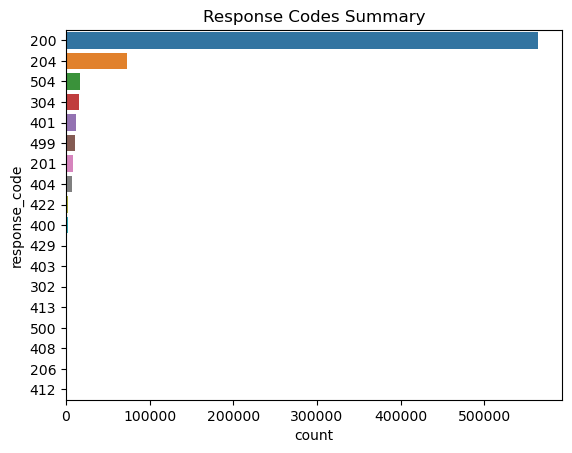

In [17]:
category_counts = df.response_code.value_counts()
sorted_categories = category_counts.index
sns.countplot(y="response_code", data=df,palette="tab10", order=sorted_categories).set_title('Response Codes Summary');

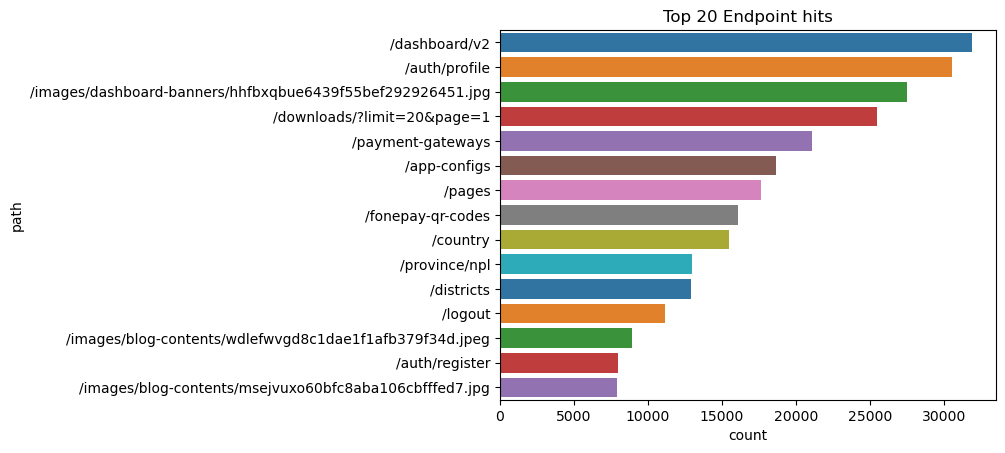

In [18]:

top_20_paths = df.path.value_counts().head(15)
top_20_paths
filtered_df = df[df['path'].isin(top_20_paths.index)]


category_counts = filtered_df['path'].value_counts()
sorted_categories = category_counts.index


sns.countplot(y="path",palette="tab10", data=df[df.path.isin(top_20_paths.index)], order =sorted_categories ).set_title('Top 20 Endpoint hits');


In [19]:
# Performs a ip to location lookup from the ip addresses

geoip_df= df.ip.value_counts()
mmdb_path = 'mmdb/GeoLite2-City.mmdb'

reader = geoip2.database.Reader(mmdb_path)


geoip_data = {
    'ip':[],
    'country':[],
    'city':[],
    'latitude':[],
    'longitude':[],
   
}

for ip in geoip_df.index:

    try:
        # Perform the lookup for the given IP address
        response = reader.city(ip)

        # Access the geolocation information
        country = response.country.name
        city = response.city.name
        latitude = response.location.latitude
        longitude = response.location.longitude
        
        geoip_data['ip'].append(ip)
        geoip_data['country'].append(country)
        geoip_data['city'].append(city)
        geoip_data['latitude'].append(latitude)
        geoip_data['longitude'].append(longitude)


        # Print the retrieved information

    except geoip2.errors.AddressNotFoundError:
        print(f"No geolocation information found for IP: {ip}")
reader.close()


    


In [20]:
# Generates a geolocation dataframe

geoip_df = pd.DataFrame(geoip_data)
geoip_df

,ip,country,city,latitude,longitude
0,43.204.239.5,India,Mumbai,19.0748,72.8856
1,110.34.1.203,Nepal,Kathmandu,27.6974,85.3318
2,103.114.24.34,Nepal,None,28.0000,84.0000
3,27.34.16.18,Nepal,Kathmandu,27.6974,85.3318
4,113.199.229.167,Nepal,Kathmandu,27.6974,85.3318
...,...,...,...,...,...
15493,79.191.229.164,Poland,Warsaw,52.2296,21.0067
15494,103.106.146.194,Nepal,None,28.0000,84.0000
15495,103.153.233.179,Nepal,None,28.0000,84.0000
15496,106.146.48.63,Japan,Tokyo,35.6837,139.6805


In [21]:
# generates with web server logs and geo location data

test = df

geo_df = df.loc[:,['ip']]
mapping_dict = geoip_df.set_index('ip')['country'].to_dict()
mapping_dict

test['country'] = test['ip'].map(geoip_df.set_index('ip')['country'])
test['city'] = test['ip'].map(geoip_df.set_index('ip')['city'])
test['latitude'] = test['ip'].map(geoip_df.set_index('ip')['latitude'])
test['longitude'] = test['ip'].map(geoip_df.set_index('ip')['longitude'])

df_loc = test
df_loc


,ip,timestamp,method,path,protocol,version,response_code,content_length,referrer,user_agent,country,city,latitude,longitude
0,120.89.104.130,27/Apr/2023:00:00:34 +0000,GET,/downloads/?limit=20&page=1,HTTP,1.1,200,2704,-,Dart/2.18 (dart:io),Nepal,Kathmandu,27.6974,85.3318
1,5.195.212.133,27/Apr/2023:00:00:34 +0000,GET,/district/4,HTTP,1.1,200,2852,-,Dart/2.18 (dart:io),United Arab Emirates,Dubai,25.0731,55.2980
2,111.119.49.187,27/Apr/2023:00:00:34 +0000,GET,/app-configs,HTTP,1.1,200,90,-,Dart/2.18 (dart:io),Nepal,Kathmandu,27.6974,85.3318
3,49.126.156.158,27/Apr/2023:00:00:34 +0000,OPTIONS,/district/Male,HTTP,2.0,204,0,-,Mozilla/5.0 (Linux; Android 11; SM-M022G Build...,Nepal,None,28.0000,84.0000
4,111.119.49.187,27/Apr/2023:00:00:34 +0000,GET,/downloads/?limit=20&page=1,HTTP,1.1,200,2704,-,Dart/2.18 (dart:io),Nepal,Kathmandu,27.6974,85.3318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715462,176.202.56.115,27/Apr/2023:19:39:02 +0000,OPTIONS,/logout,HTTP,2.0,499,0,-,Mozilla/5.0 (Linux; Android 10; M2006C3MG) App...,Qatar,Doha,25.2925,51.5321
715463,99.247.224.242,27/Apr/2023:19:18:53 +0000,OPTIONS,/logout,HTTP,2.0,499,0,-,Mozilla/5.0 (Linux; Android 10; SM-G965W) Appl...,Canada,Woodbridge,43.8419,-79.5565
715464,99.247.224.242,27/Apr/2023:19:18:53 +0000,OPTIONS,/executive-members?limit=50,HTTP,2.0,499,0,-,Mozilla/5.0 (Linux; Android 10; SM-G965W) Appl...,Canada,Woodbridge,43.8419,-79.5565
715465,99.247.224.242,27/Apr/2023:19:18:53 +0000,OPTIONS,/dashboard/v2,HTTP,2.0,499,0,-,Mozilla/5.0 (Linux; Android 10; SM-G965W) Appl...,Canada,Woodbridge,43.8419,-79.5565


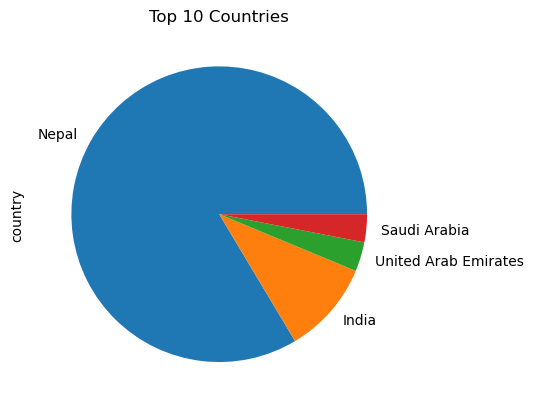

In [22]:
pie = df_loc.country.value_counts().head(4).plot(kind='pie');
pie.set_title('Top 10 Countries');


In [23]:
tmp = geo_df.value_counts().reset_index()
tmp.columns = ['ip','counts']

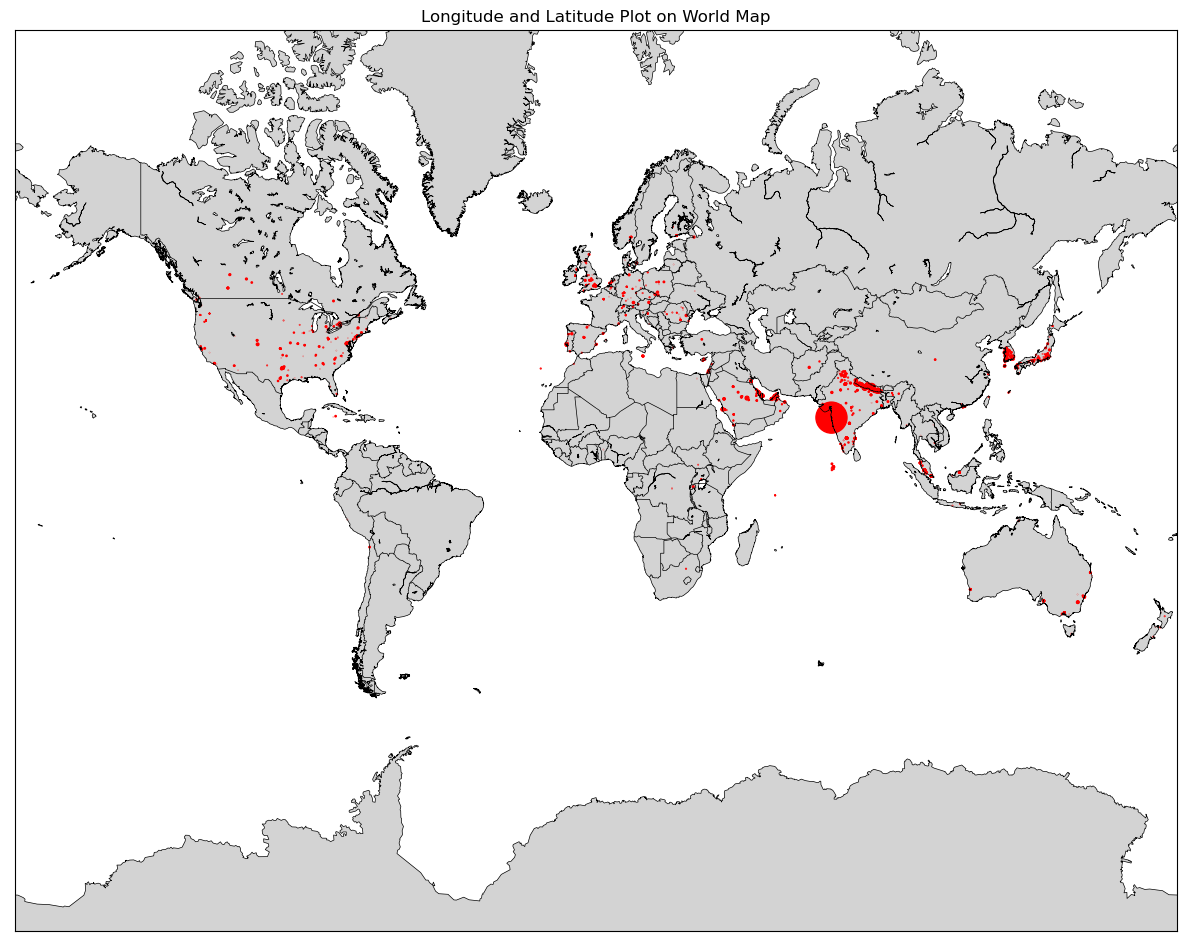

In [24]:
# Plots the geolocation data into a worldmap

data = {
    'longitude': [-122.4194, -73.935242, 139.6917, -0.1276],
    'latitude': [37.7749, 40.730610, 35.6895, 51.5074]
}
magnitude=tmp['counts']
max_magnitude=500
normalized_magnitude=magnitude/magnitude.max()
marker_size=max_magnitude*normalized_magnitude


# Create the map
# Plot the points
plt.figure(figsize=(15, 15))  # Adjust the figure size as desired
map = Basemap(projection='merc', lat_0=0, lon_0=0, resolution='l', llcrnrlon=-180, urcrnrlon=180, llcrnrlat=-80, urcrnrlat=80)

# Draw coastlines, countries, and states
map.drawcoastlines(linewidth=0.5)
map.fillcontinents(color='lightgray', lake_color='white')
map.drawcountries()

# Convert longitude and latitude to map coordinates
x, y = map(geoip_df['longitude'].values, geoip_df['latitude'].values)
#plt.scatte# generates a dataframe
df = pd.DataFrame(data)


# Plot the points on the map
map.scatter(x, y, color='red', marker='o',s=marker_size)

# Show the map
plt.title('Longitude and Latitude Plot on World Map')
plt.show()
